In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px
from datetime import datetime
import mplfinance as mpf
# !pip install statsmodels
import statsmodels.api as sm
# !pip install seaborn
import seaborn as sns
import plotly.graph_objects as go

In [11]:
df = pd.read_csv('load_data.csv' , delimiter= ',')
df.columns
df['spread'] = df['SMF (TL/MWh)'] - df['PTF (TL/MWh)Okuma Yukumlulu']    
df['target_load'] = df['YAL (0) Kodlu (MWh)'] + df['YAL (1) Kodlu (MWh)'] + df['YAL (2) Kodlu (MWh)'] - df['YAL Teslim Edilmeyen (MWh)'] - df['YAT (0) Kodlu (MWh)'] - df['YAT (1) Kodlu (MWh)'] - df['YAT (2) Kodlu (MWh)'] + df['YAT Teslim Edilmeyen (MWh)']
print(df.columns)
df = df.fillna(0)
print(len(df))
df['Date'] = pd.date_range(start = '20180201' , freq = 'H' , periods = len(df))
df = df[['Date' , 'target_load']]
df.set_index('Date' , inplace = True)
df = df.asfreq('h')
len(df)

Index(['Saat', 'Yuk Tahmin Plani (MWh)', 'Ikili Anlasma (MWh)',
       'PTF (TL/MWh)Okuma Yukumlulu', 'SAM (MWh)', 'SSM(MWh)', 'KGUP (MWh)',
       'SMF (TL/MWh)', 'YAL (0) Kodlu (MWh)', 'YAL (1) Kodlu (MWh)',
       'YAL (2) Kodlu (MWh)', 'YAL Teslim Edilmeyen (MWh)',
       'YAT (0) Kodlu (MWh)', 'YAT (1) Kodlu (MWh)', 'YAT (2) Kodlu (MWh)',
       'YAT Teslim Edilmeyen (MWh)', 'spread', 'target_load'],
      dtype='object')
26328


26328

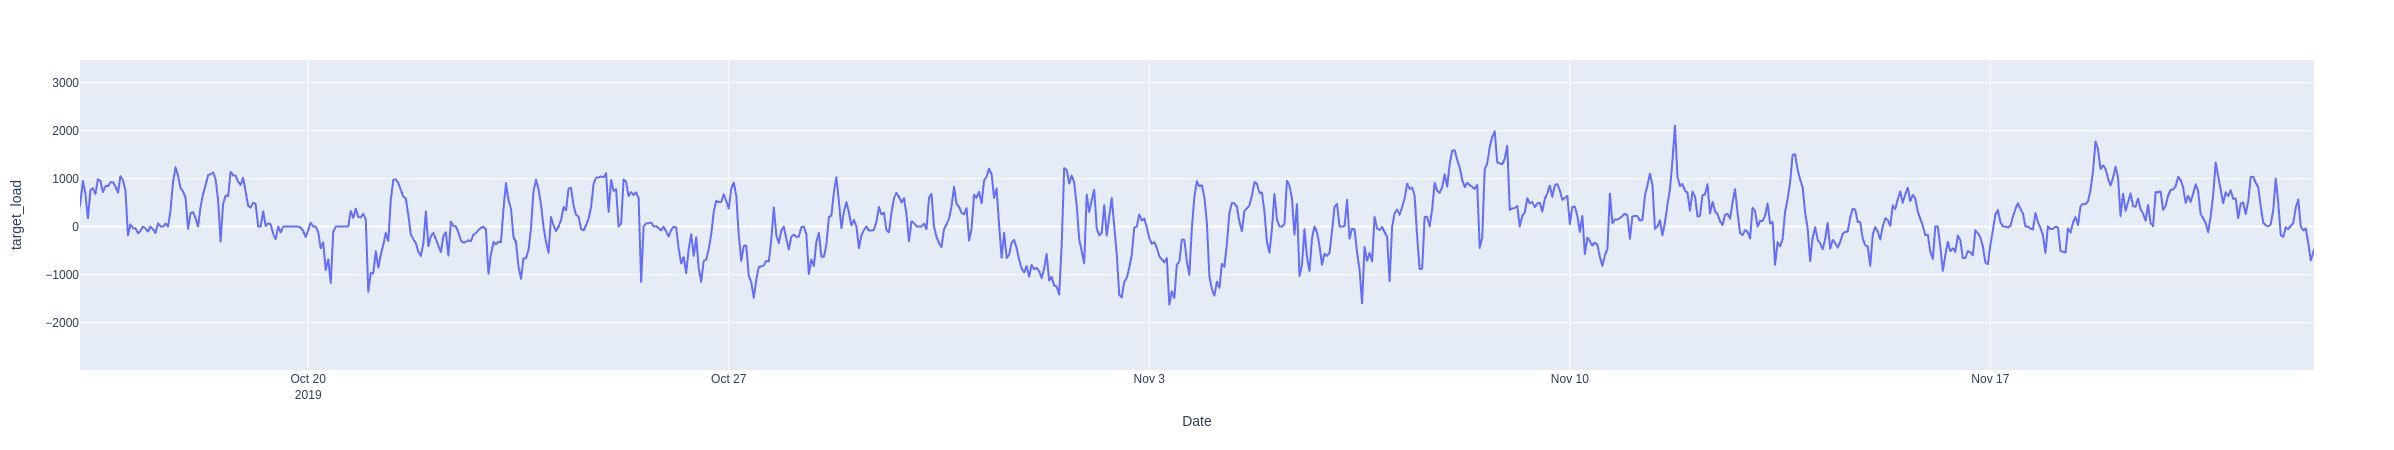

In [12]:
fig = px.line(df,x = df.index , y = 'target_load')
fig.show()

<AxesSubplot:xlabel='Date'>

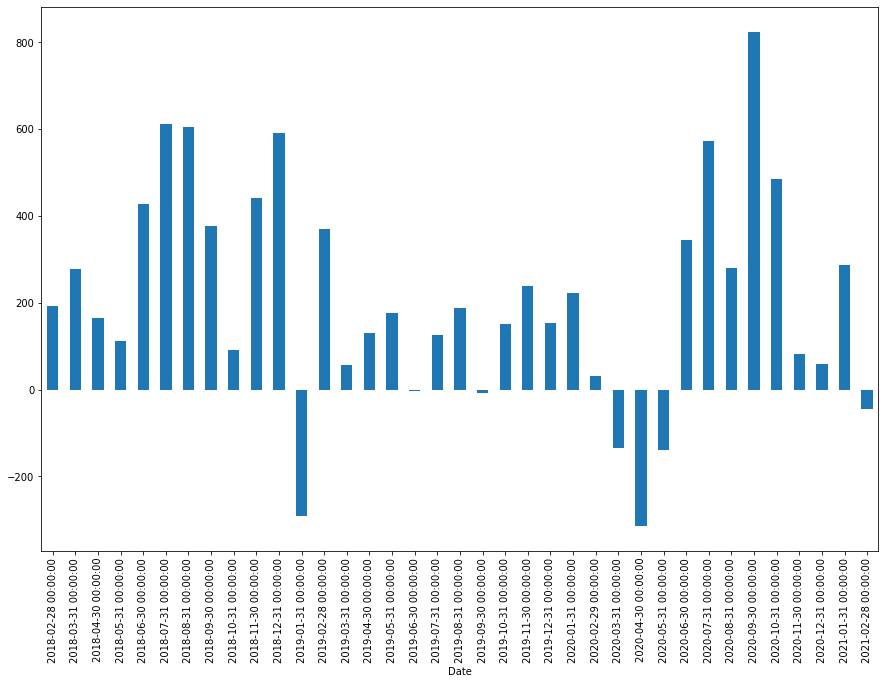

In [61]:
df['target_load'].resample(rule = 'M').mean().plot.bar(figsize = (15,10))

In [19]:
monthly_dataCsv =  df['target_load'].resample(rule = 'M').mean()
monthly_dataCsv

Date
2018-02-28    192.103065
2018-03-31    277.676855
2018-04-30    164.548500
2018-05-31    113.112137
2018-06-30    427.933722
2018-07-31    611.801989
2018-08-31    604.492339
2018-09-30    377.594556
2018-10-31     90.264234
2018-11-30    441.941222
2018-12-31    591.133642
2019-01-31   -292.022823
2019-02-28    371.057202
2019-03-31     55.947634
2019-04-30    131.395792
2019-05-31    176.267366
2019-06-30     -2.254667
2019-07-31    127.082796
2019-08-31    188.767917
2019-09-30     -8.159861
2019-10-31    150.632245
2019-11-30    238.842806
2019-12-31    153.349315
2020-01-31    221.984987
2020-02-29     30.938937
2020-03-31   -133.864180
2020-04-30   -314.091944
2020-05-31   -138.257419
2020-06-30    344.568472
2020-07-31    572.857661
2020-08-31    279.846277
2020-09-30    824.665250
2020-10-31    485.068427
2020-11-30     82.749292
2020-12-31     58.189651
2021-01-31    286.283226
2021-02-28    -45.507083
Freq: M, Name: target_load, dtype: float64

<AxesSubplot:xlabel='Date'>

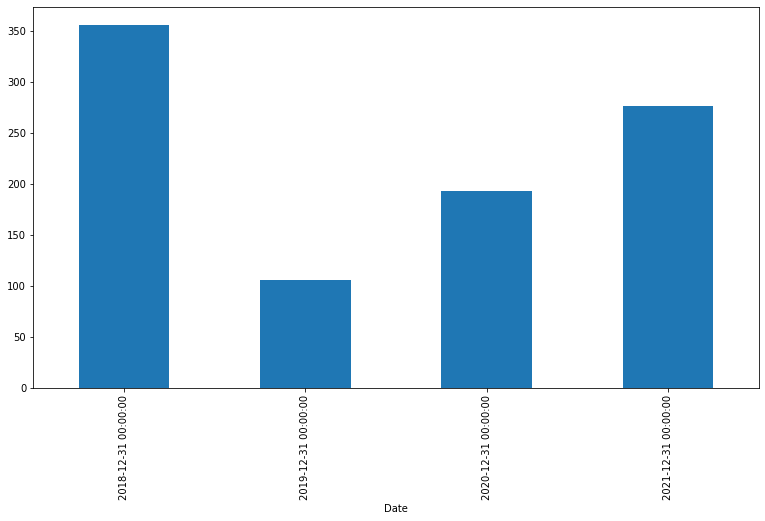

In [25]:
df['target_load'].resample(rule = 'A').mean().plot.bar(figsize = (13,7))

In [21]:
yearly_datacsv = df['target_load'].resample(rule = 'A').mean()
yearly_datacsv

Date
2018-12-31    355.336356
2019-12-31    105.602963
2020-12-31    193.318439
2021-12-31    275.914779
Freq: A-DEC, Name: target_load, dtype: float64

<AxesSubplot:xlabel='Date'>

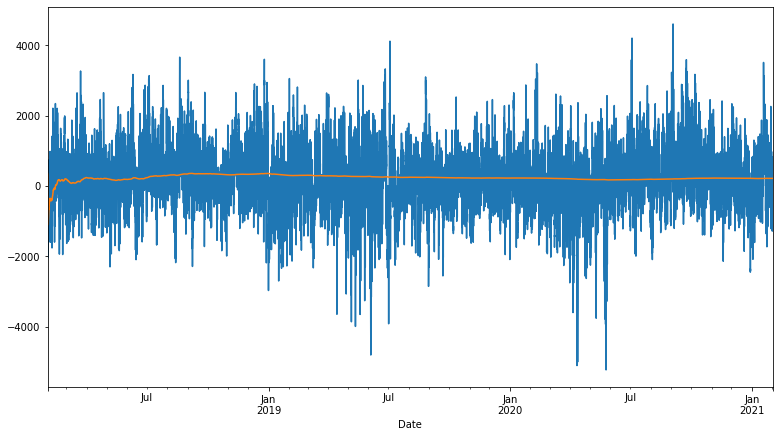

In [22]:
df['target_load'].plot()
df['target_load'].expanding().mean().plot(figsize = (13,7))

<AxesSubplot:xlabel='Date'>

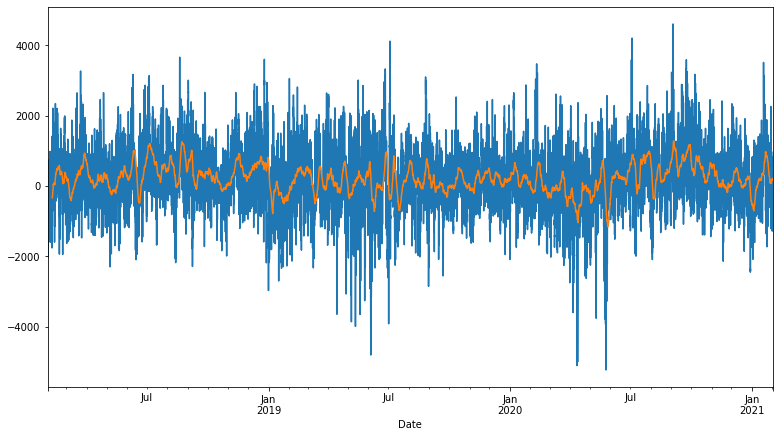

In [26]:
df['target_load'].plot()
df.rolling(window = 24*7).mean()['target_load'].plot(figsize = (13,7))

In [3]:
df['spread'] = df['SMF(TL/MWh)'] - df['PTF(TL/MWh)']
df['target_load'] = df['YAL0(TL/MWh)'] + df['YAL1(TL/MWh)'] - df['YAL TeslimEdilemeyenMiktar(MWh)'] - df['YAT0(TL/MWh)'] - df['YAT1(TL/MWh)'] + df['YAT TeslimEdilemeyenMiktar(MWh)']
df.head()

,tarih,saat,YukTahminPlan(MWh),PTF(TL/MWh),SMF(TL/MWh),KGUP(TL/MWh),YAL0(TL/MWh),YAL1(TL/MWh),YAT0(TL/MWh),YAT1(TL/MWh),YAL TeslimEdilemeyenMiktar(MWh),YAT TeslimEdilemeyenMiktar(MWh),PFK Fiyat,SFK Fiyat,spread,target_load
0,201802,0,33700,217.12,217.12,31061.72,129.602,0.0,80.833,0.0,3.52,4.00,80.02,79.89,0.00,49.249
1,201802,1,31500,203.28,213.20,28579.52,856.082,0.0,0.000,0.0,197.56,0.00,80.02,79.89,9.92,658.522
2,201802,2,30200,175.04,175.04,27152.95,NaN,NaN,NaN,NaN,NaN,NaN,80.02,79.89,0.00,NaN
3,201802,3,29100,178.01,128.00,26367.11,0.000,0.0,943.950,0.0,0.00,155.43,80.02,79.89,-50.01,-788.520
4,201802,4,29100,132.10,125.00,26151.66,0.000,0.0,515.500,0.0,0.00,18.31,70.02,98.01,-7.10,-497.190


In [4]:
len(df)

26328

In [5]:
df = df.fillna(0)
len(df)

26328

In [6]:
df['Date'] = pd.date_range(start = '20180201' , freq = 'H' , periods = len(df))
df = df[['Date' , 'target_load']]

In [27]:
print(df.dtypes)
print(df.describe())
df.head()

target_load    float64
dtype: object
        target_load
count  26328.000000
mean     215.871692
std      872.177270
min    -5229.320000
25%     -294.072500
50%      162.745000
75%      743.902500
max     4605.690000


,target_load
Date,
2018-02-01 00:00:00,49.25
2018-02-01 01:00:00,658.52
2018-02-01 02:00:00,0.00
2018-02-01 03:00:00,-788.52
2018-02-01 04:00:00,-497.19


In [8]:
df.set_index('Date' , inplace = True)

In [187]:
df.mean()

target_load      216.276895
year            2019.087511
hour                    inf
WEEKDAY            3.002735
weekend_indi       0.000000
weekend            0.286235
dtype: float64

In [9]:
df = df.asfreq('h')

In [10]:
df.index

DatetimeIndex(['2018-02-01 00:00:00', '2018-02-01 01:00:00',
               '2018-02-01 02:00:00', '2018-02-01 03:00:00',
               '2018-02-01 04:00:00', '2018-02-01 05:00:00',
               '2018-02-01 06:00:00', '2018-02-01 07:00:00',
               '2018-02-01 08:00:00', '2018-02-01 09:00:00',
               ...
               '2021-02-01 14:00:00', '2021-02-01 15:00:00',
               '2021-02-01 16:00:00', '2021-02-01 17:00:00',
               '2021-02-01 18:00:00', '2021-02-01 19:00:00',
               '2021-02-01 20:00:00', '2021-02-01 21:00:00',
               '2021-02-01 22:00:00', '2021-02-01 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=26328, freq='H')

In [28]:
df['year'] = [d.year for d in df.index]

df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
df['hour'] = [d.strftime('%H') for d in df.index]
df['WEEKDAY'] = pd.to_datetime(df.index).dayofweek
df['weekend'] = 0          
df.loc[df['WEEKDAY'].isin([5, 6]), 'weekend'] = 1  # 5 and 6 weekends

,target_load,year,month,hour,WEEKDAY,weekend_indi,weekend
Date,,,,,,,
2018-02-01 00:00:00,49.249,2018,Feb,00,3,0,0
2018-02-01 01:00:00,658.522,2018,Feb,01,3,0,0
2018-02-01 02:00:00,658.522,2018,Feb,02,3,0,0
2018-02-01 03:00:00,-788.520,2018,Feb,03,3,0,0
2018-02-01 04:00:00,-497.190,2018,Feb,04,3,0,0


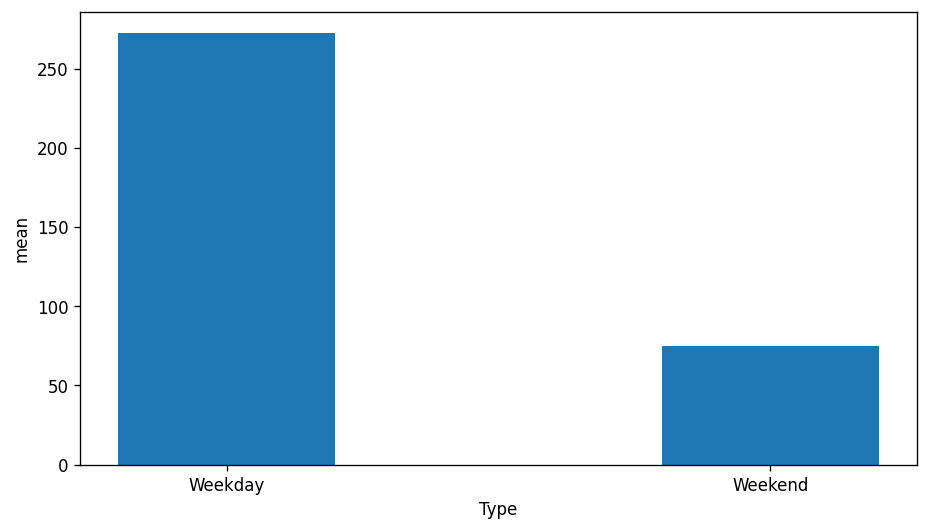

In [59]:
weekday_mean = df['target_load'].where(df['weekend'] == 0 ).mean()
weekedn_mean = df['target_load'].where(df['weekend'] == 1 ).mean()
mean_dayType = {'Weekday':weekday_mean , 'Weekend':weekedn_mean}
weektypeName = list(mean_dayType.keys())
weektypeValues = list(mean_dayType.values())
fig = plt.figure(figsize = (9, 5),dpi = 120) 
  
# creating the bar plot 
plt.bar(weektypeName, weektypeValues,  
        width = 0.4) 
  
plt.xlabel("Type") 
plt.ylabel("mean") 
plt.show() 

272.3736297360579

In [31]:
print("weekday mean: " , weekday_mean)
print("weekend mean" , weekedn_mean)

weekday mean:  272.3736297360579
weekend mean 74.97673301486198


In [46]:
weekdays = df.WEEKDAY.unique()
weekdays.sort()

In [47]:
weekdays_average = {}
for i in weekdays:
    weekdays_average[i] = df['target_load'].where(df['WEEKDAY'] == i ).mean()
weekdays_average

{0: 195.90292462845014,
 1: 309.52213942307696,
 2: 288.9957398504274,
 3: 320.23069798301486,
 4: 247.55913481953291,
 5: 138.72787685774946,
 6: 11.225589171974534}

Text(0, 0.5, 'mean')

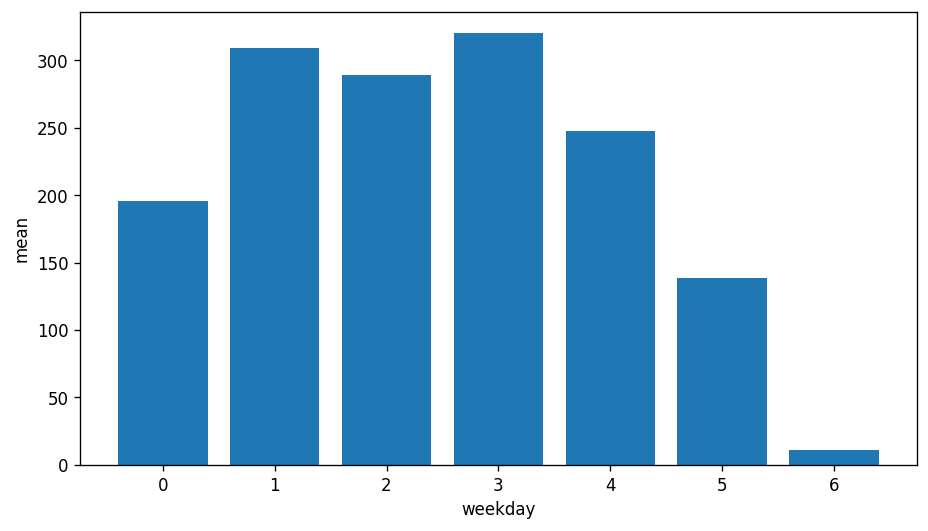

In [58]:
dayNumber = list(weekdays_average.keys())
mean_weekday = list(weekdays_average.values())
fig = plt.figure(figsize = (9,5),dpi = 120)
plt.bar(dayNumber , mean_weekday)
plt.xlabel("weekday")
plt.ylabel('mean')

Text(0, 0.5, 'Standard Deviation')

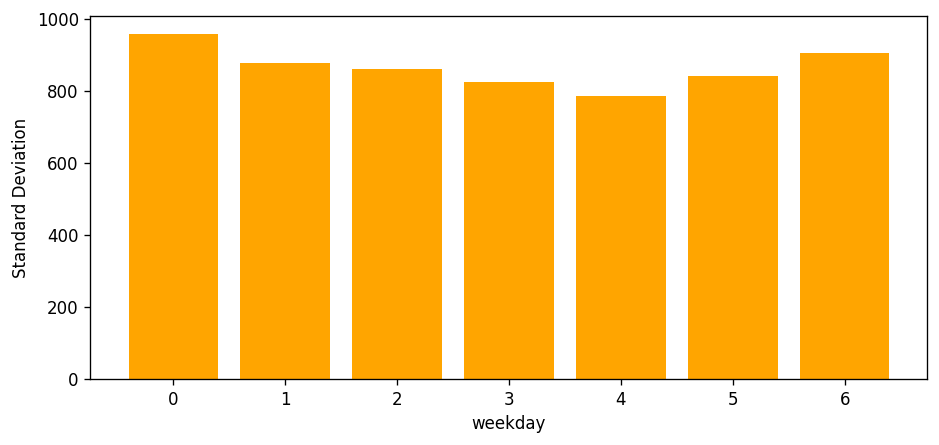

In [57]:
weekdays_std = {}
for i in weekdays:
    weekdays_std[i] = df['target_load'].where(df['WEEKDAY'] == i ).std()



dayNumber = list(weekdays_std.keys())
std_weekday = list(weekdays_std.values())
fig = plt.figure(figsize = (9,4),dpi = 120)
plt.bar(dayNumber , std_weekday , color = 'orange')
plt.xlabel("weekday")
plt.ylabel('Standard Deviation')

In [51]:
weekdays_std

{0: 958.4152249579566,
 1: 877.9033468828849,
 2: 861.0717244625223,
 3: 824.3770944536241,
 4: 785.1976395995467,
 5: 841.6729292837845,
 6: 903.641647890909}

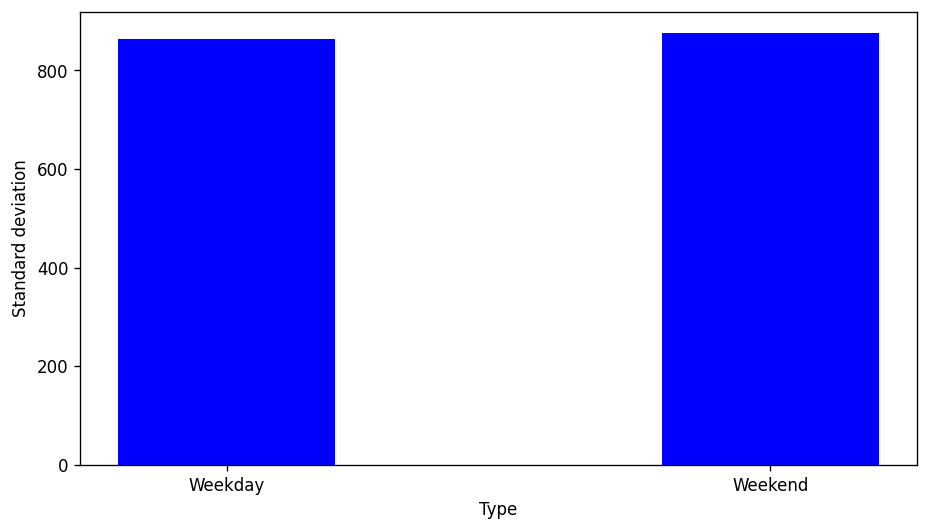

In [56]:
weekday_std = df['target_load'].where(df['weekend'] == 0 ).std()
weekedn_std = df['target_load'].where(df['weekend'] == 1 ).std()
std_dayType = {'Weekday':weekday_std , 'Weekend':weekedn_std}
weektypeName = list(std_dayType.keys())
weektypeValues = list(std_dayType.values())
fig = plt.figure(figsize = (9, 5) , dpi = 120) 
  
# creating the bar plot 
plt.bar(weektypeName, weektypeValues, color ='blue',
        width = 0.4) 
  
plt.xlabel("Type") 
plt.ylabel("Standard deviation") 
plt.show() 

In [53]:
print("weekday std: " ,weekday_std )
print("weekend std: ",weekedn_std )

weekday std:  864.4475772463068
weekend std:  875.473773658085


<AxesSubplot:xlabel='WEEKDAY', ylabel='target_load'>

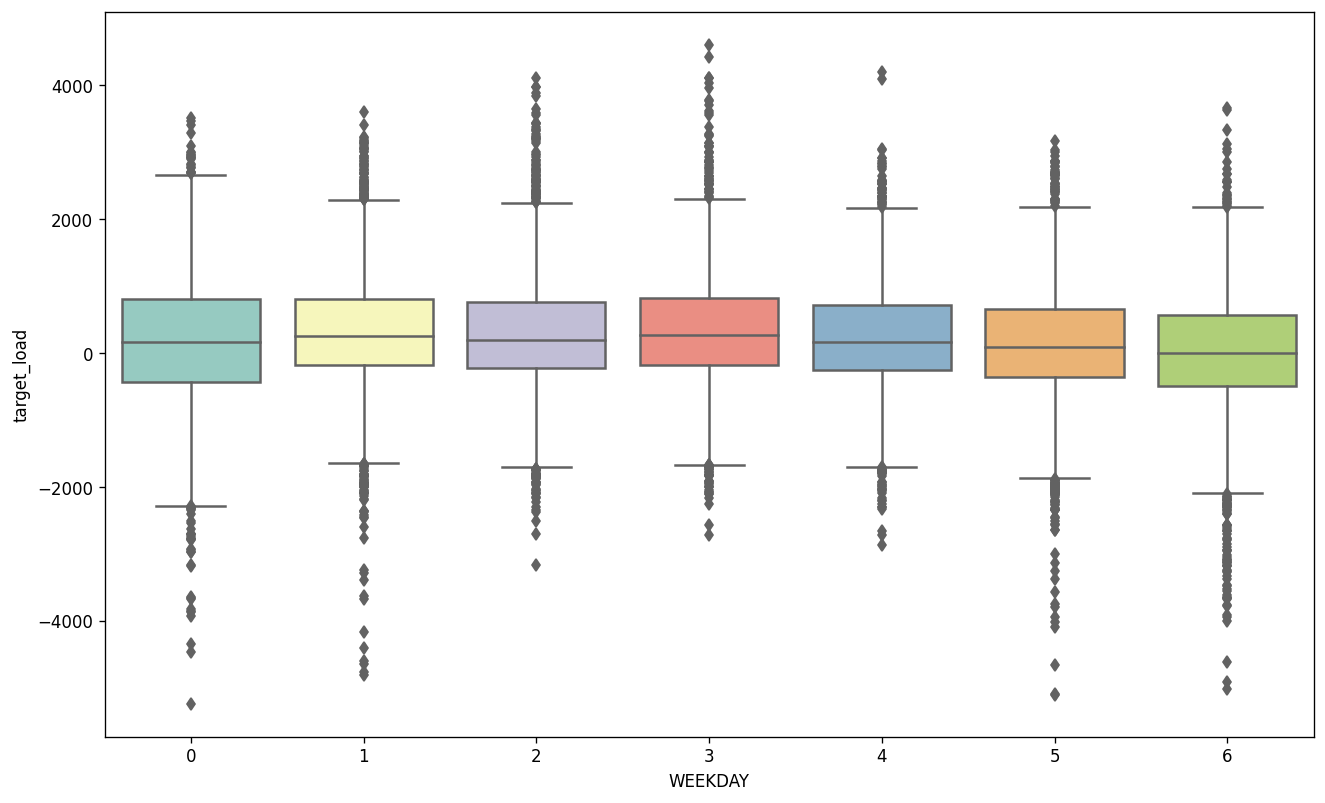

In [54]:
plt.figure(figsize=(13,8) , dpi = 120)
sns.boxplot(x = 'WEEKDAY' , y = 'target_load' , data = df, palette="Set3")

<AxesSubplot:xlabel='year', ylabel='target_load'>

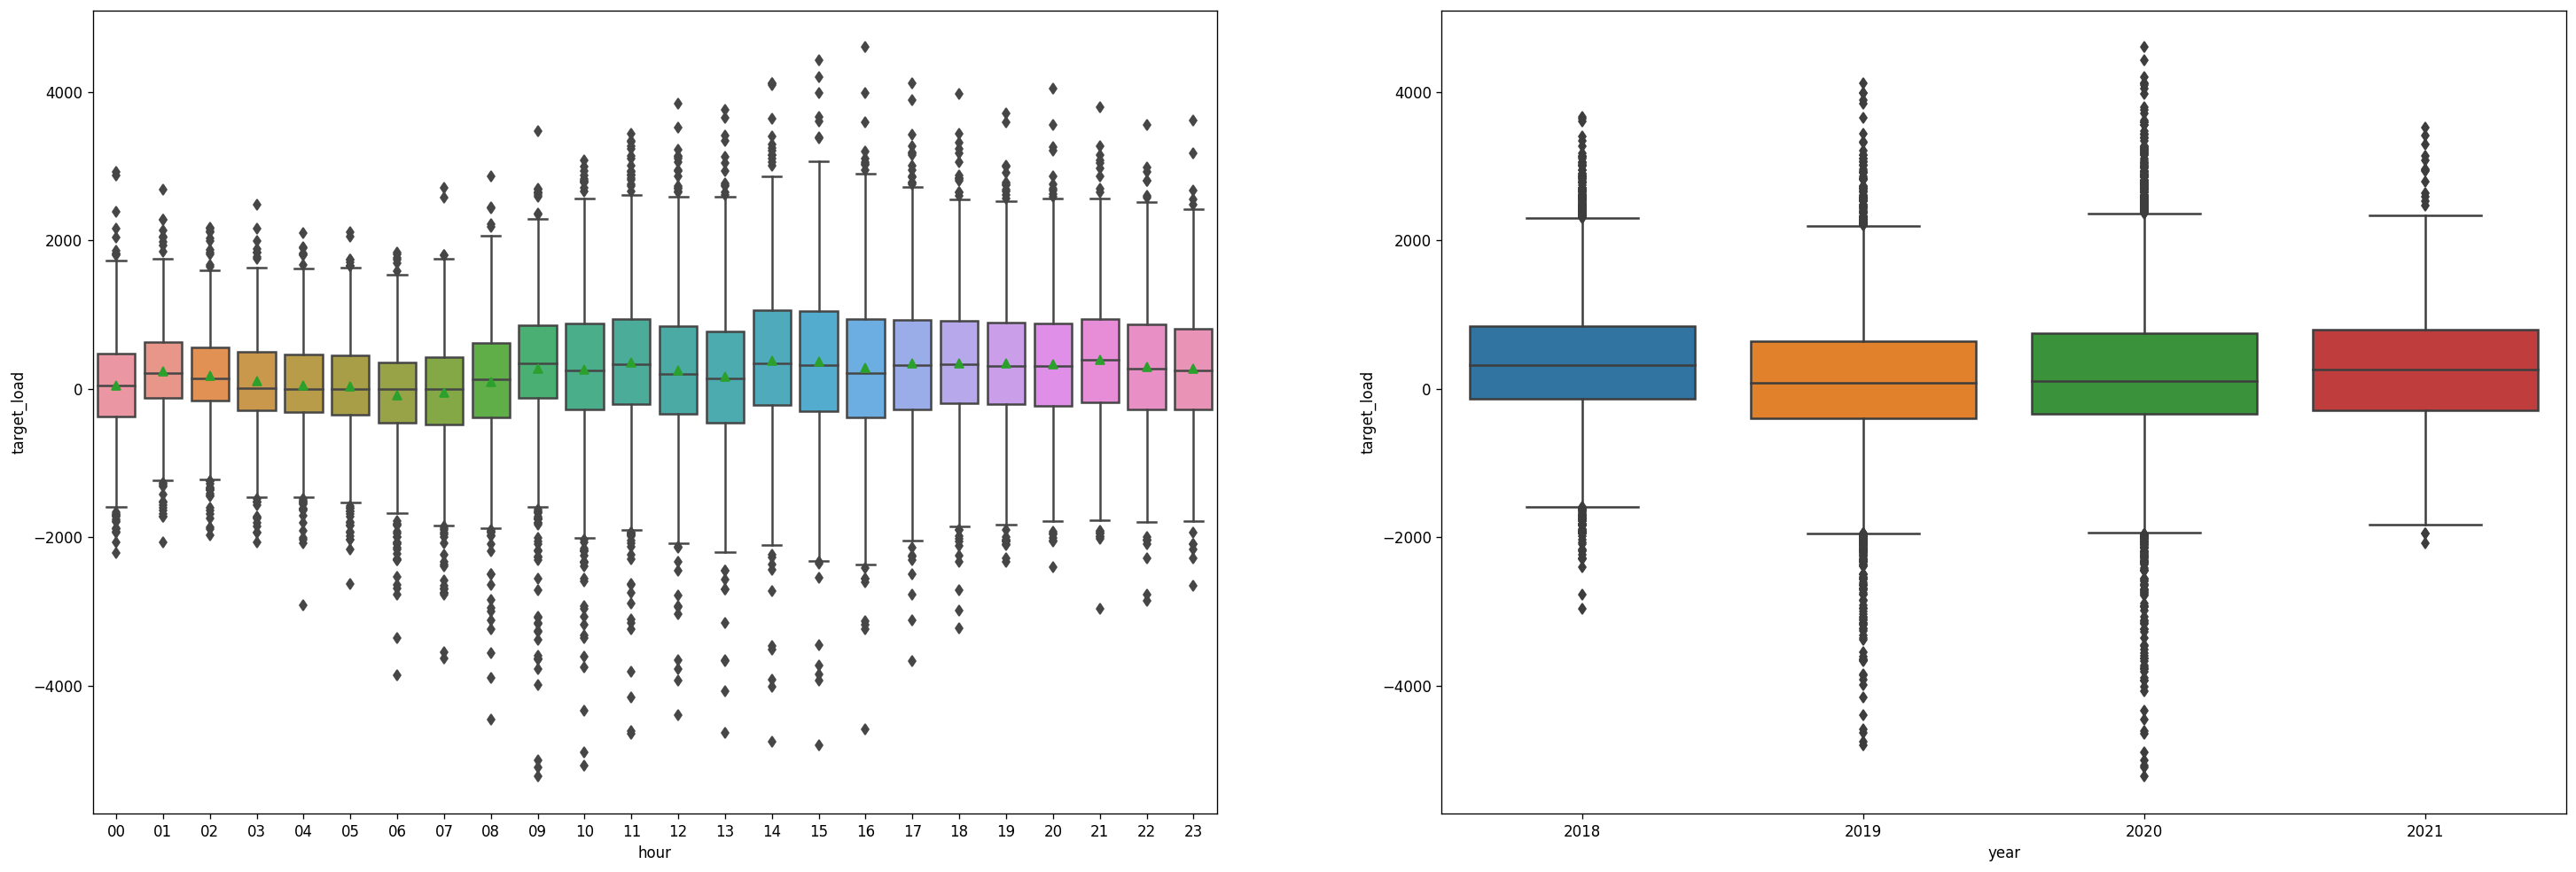

In [92]:
fig , axes = plt.subplots(1,2,figsize=(30,10), dpi= 120)
sns.boxplot(x = 'hour' , y = 'target_load' , data = df , ax = axes[0],showmeans=True)
sns.boxplot(x = 'year' , y = 'target_load' , data = df)

In [90]:
x = sns.boxplot(x = 'hour' , y = 'target_load' , data = df , ax = axes[0])

<AxesSubplot:xlabel='year', ylabel='target_load'>

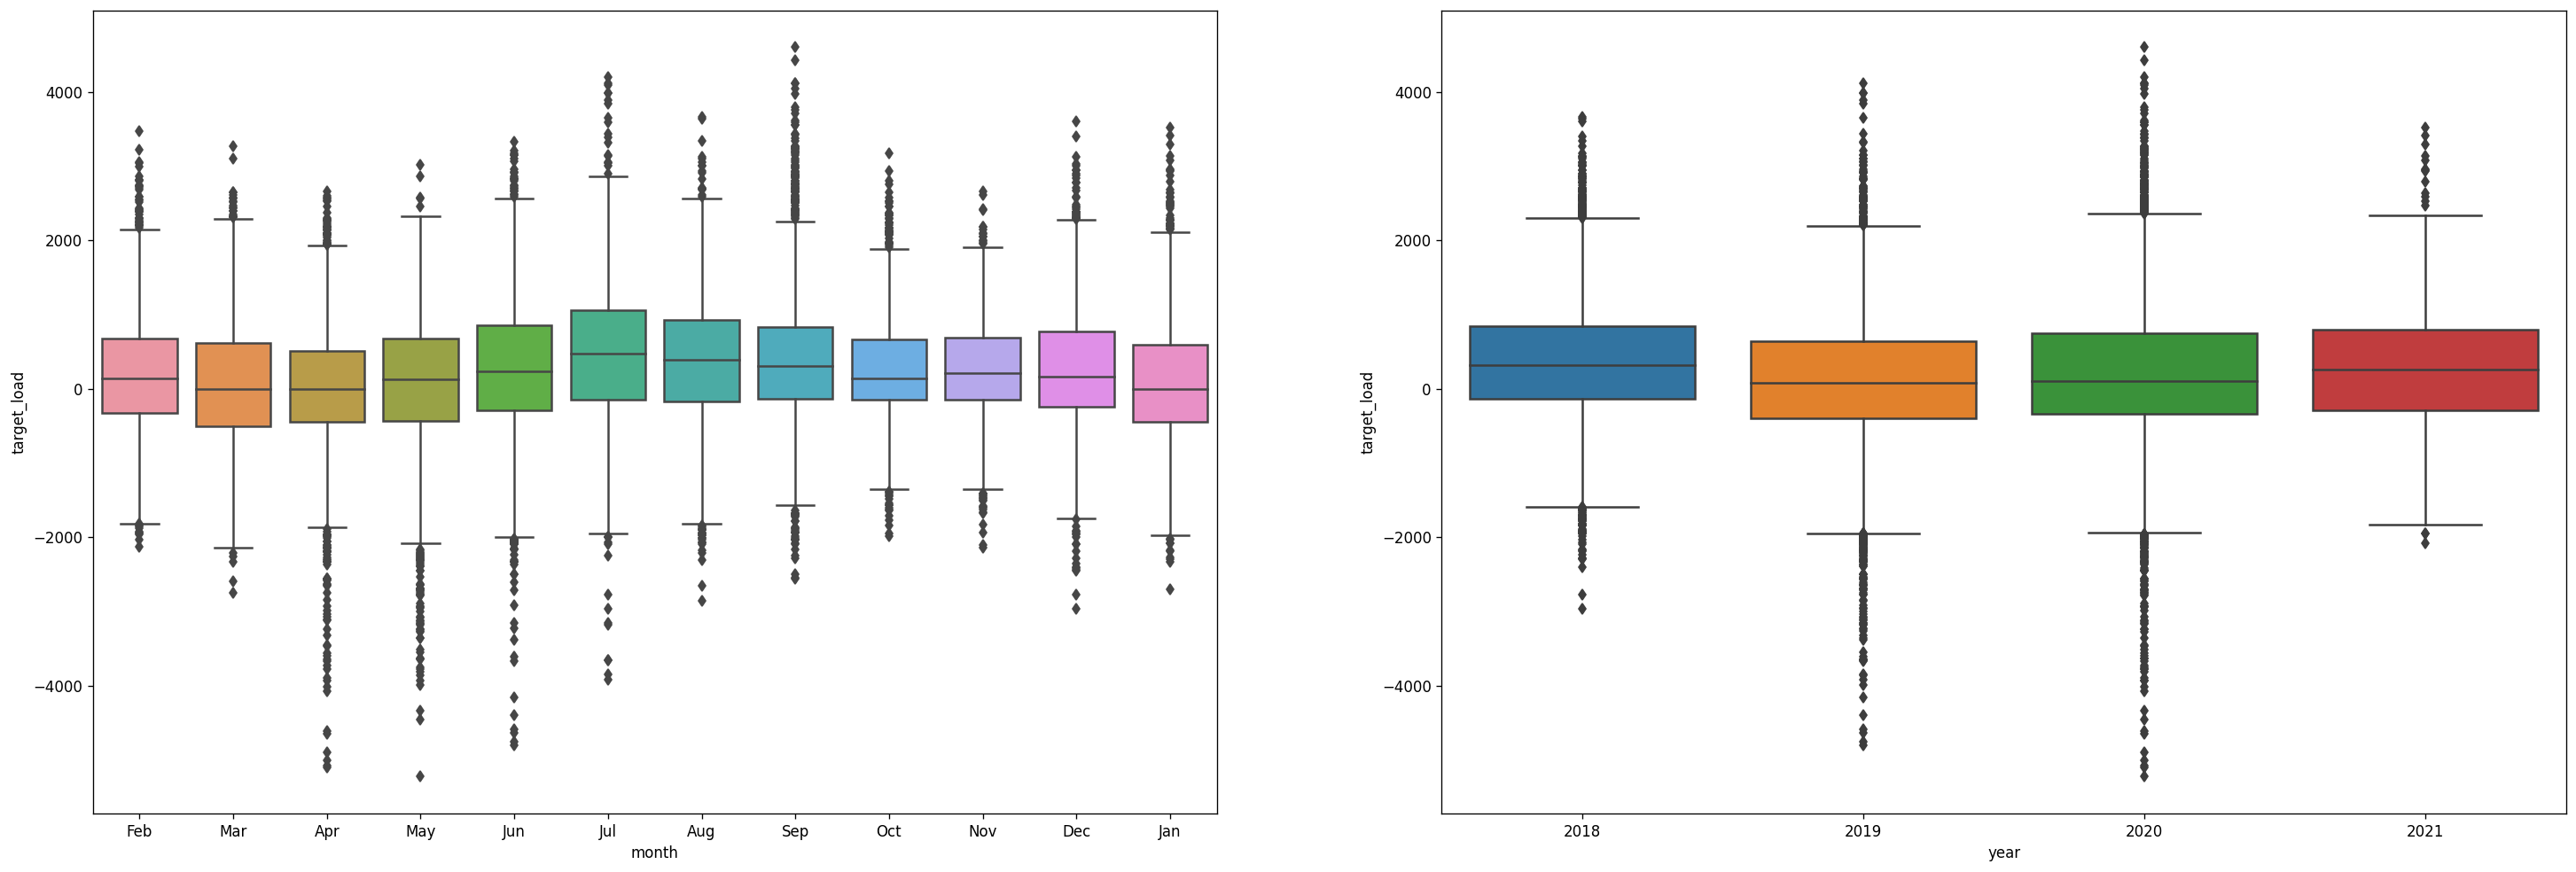

In [91]:
fig , axes = plt.subplots(1,2,figsize=(30,10), dpi= 120)
sns.boxplot(x = 'month' , y = 'target_load' , data = df , ax = axes[0])
sns.boxplot(x = 'year' , y = 'target_load' , data = df)

In [67]:
positive = 0
negative = 0

for n in df['target_load']:
    if n >= 0:
        positive +=1
    elif n<0:
        negative +=1

positive/(positive + negative)

0.6196065025828016

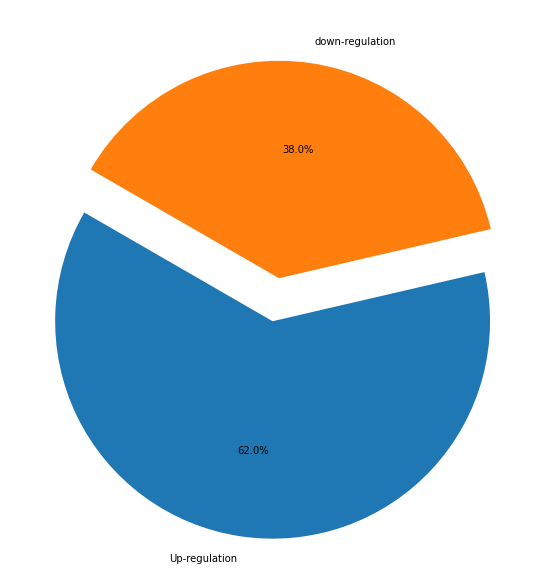

In [93]:
listt = [positive , negative]
labels = 'Up-regulation' , 'down-regulation'
sizes = listt
explode =(0.2 , 0)
plt.figure(figsize=(16,10))

plt.pie(sizes , labels = labels ,autopct='%1.1f%%', startangle=150, explode=explode)
# plt.figure(figsize=(20,20))
plt.show()

In [69]:
df.head()

,target_load,year,month,hour,WEEKDAY,weekend
Date,,,,,,
2018-02-01 00:00:00,49.25,2018,Feb,00,3,0
2018-02-01 01:00:00,658.52,2018,Feb,01,3,0
2018-02-01 02:00:00,0.00,2018,Feb,02,3,0
2018-02-01 03:00:00,-788.52,2018,Feb,03,3,0
2018-02-01 04:00:00,-497.19,2018,Feb,04,3,0




histogram of data at time:  00


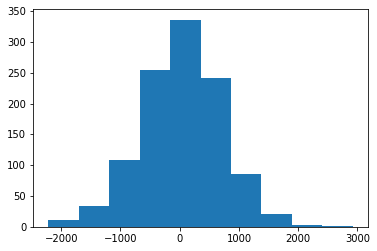



histogram of data at time:  01


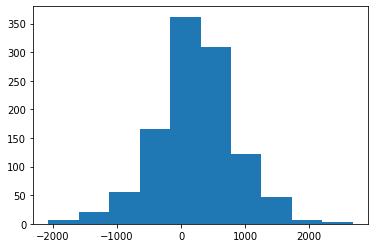



histogram of data at time:  02


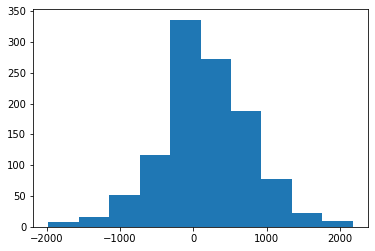



histogram of data at time:  03


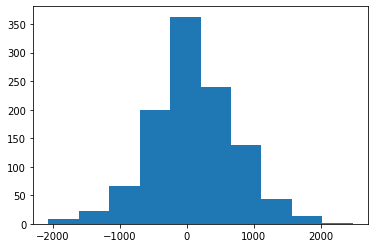



histogram of data at time:  04


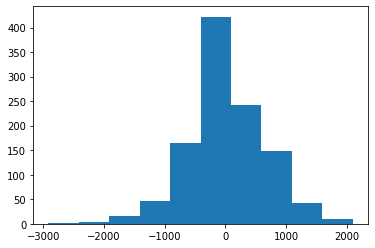



histogram of data at time:  05


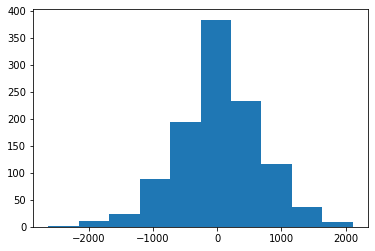



histogram of data at time:  06


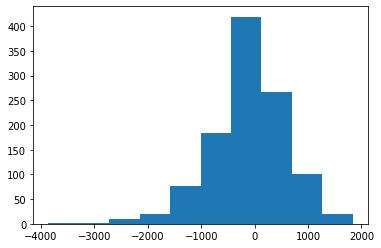



histogram of data at time:  07


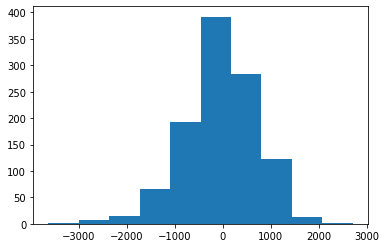



histogram of data at time:  08


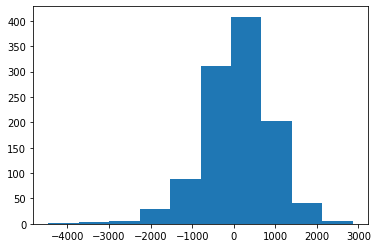



histogram of data at time:  09


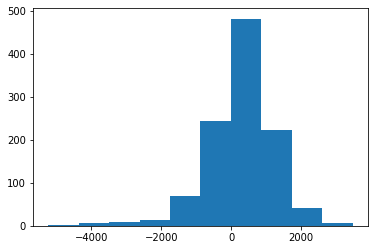



histogram of data at time:  10


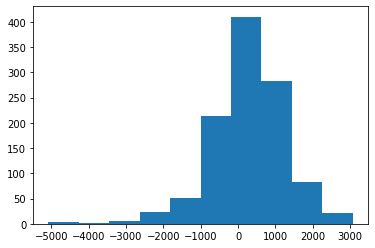



histogram of data at time:  11


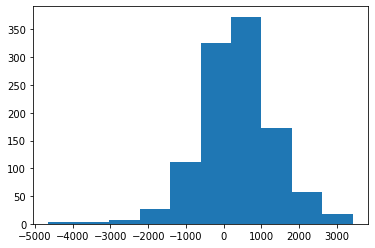



histogram of data at time:  12


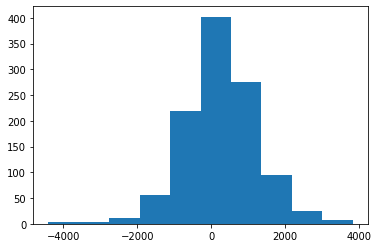



histogram of data at time:  13


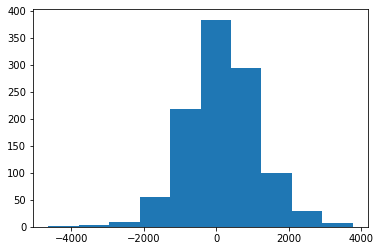



histogram of data at time:  14


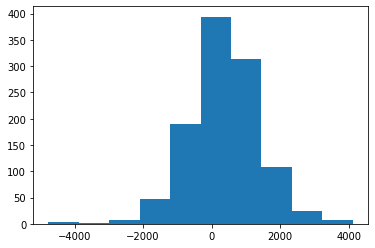



histogram of data at time:  15


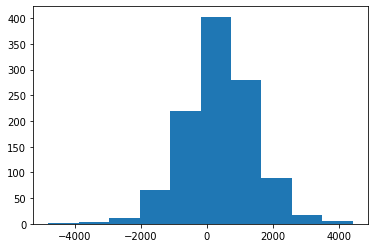



histogram of data at time:  16


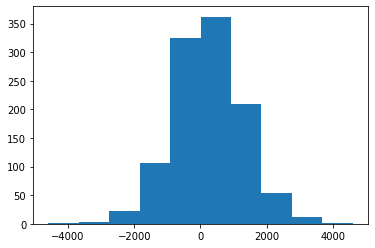



histogram of data at time:  17


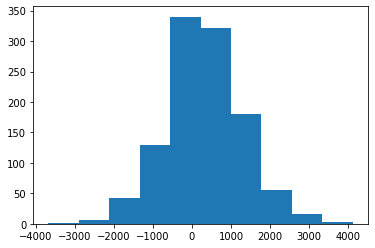



histogram of data at time:  18


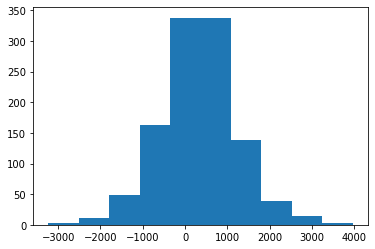



histogram of data at time:  19


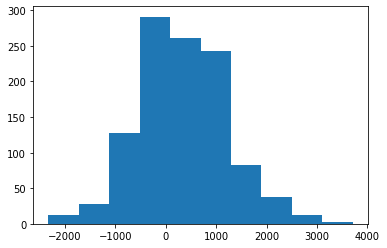



histogram of data at time:  20


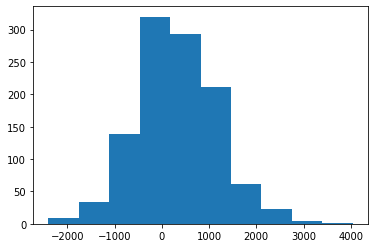



histogram of data at time:  21


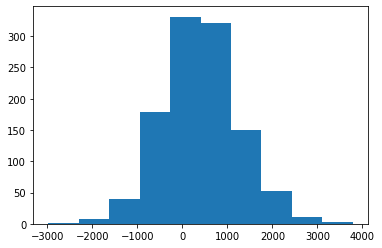



histogram of data at time:  22


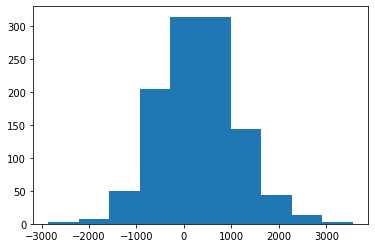



histogram of data at time:  23


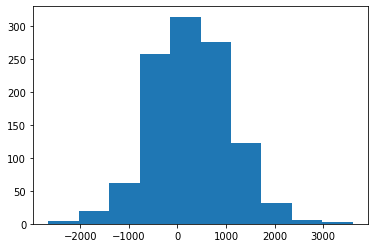

In [70]:
hours = list(df.hour.unique())
for i in hours:
    print('\n')
    print('histogram of data at time: ' , i)
    plt.hist(df['target_load'].where(df['hour'] == i).dropna())
    plt.show()




histogram of data at month:  Feb


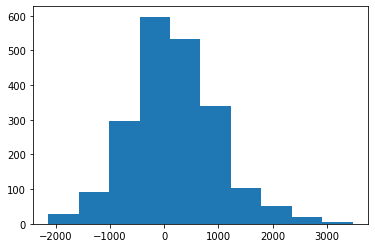



histogram of data at month:  Mar


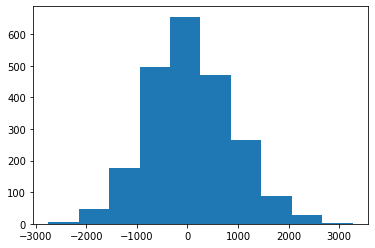



histogram of data at month:  Apr


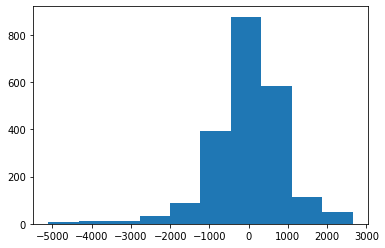



histogram of data at month:  May


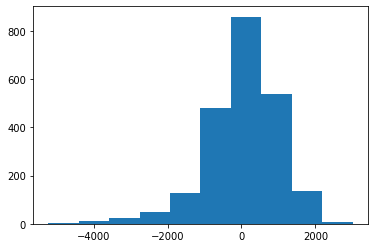



histogram of data at month:  Jun


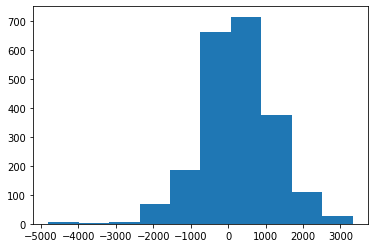



histogram of data at month:  Jul


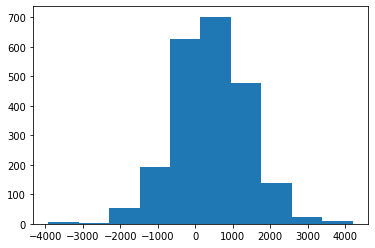



histogram of data at month:  Aug


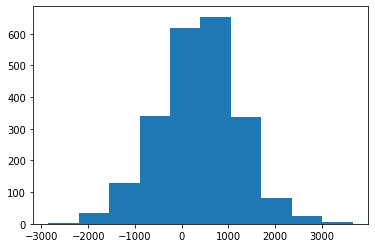



histogram of data at month:  Sep


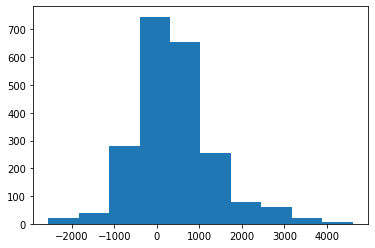



histogram of data at month:  Oct


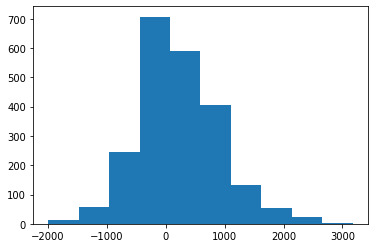



histogram of data at month:  Nov


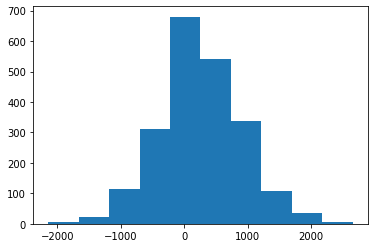



histogram of data at month:  Dec


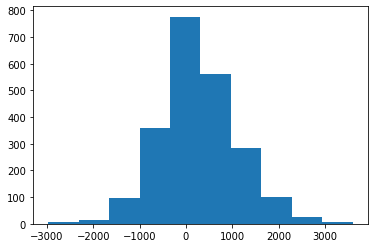



histogram of data at month:  Jan


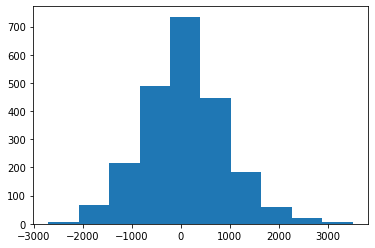

In [71]:
months = list(df.month.unique())
for i in months:
    print('\n')
    print('histogram of data at month: ' , i)
    plt.hist(df['target_load'].where(df['month'] == i).dropna())
    plt.show()

In [73]:
weekdaystype = list(df['weekend'].unique())
weekdaystype
#0: weekday

[0, 1]

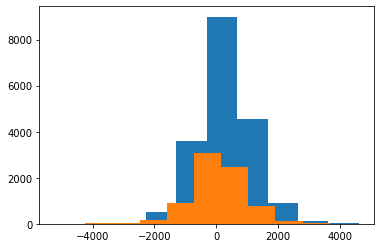

In [74]:
for i in weekdaystype:
    plt.hist(df['target_load'].where(df['weekend'] == i).dropna())

<AxesSubplot:xlabel='Date'>

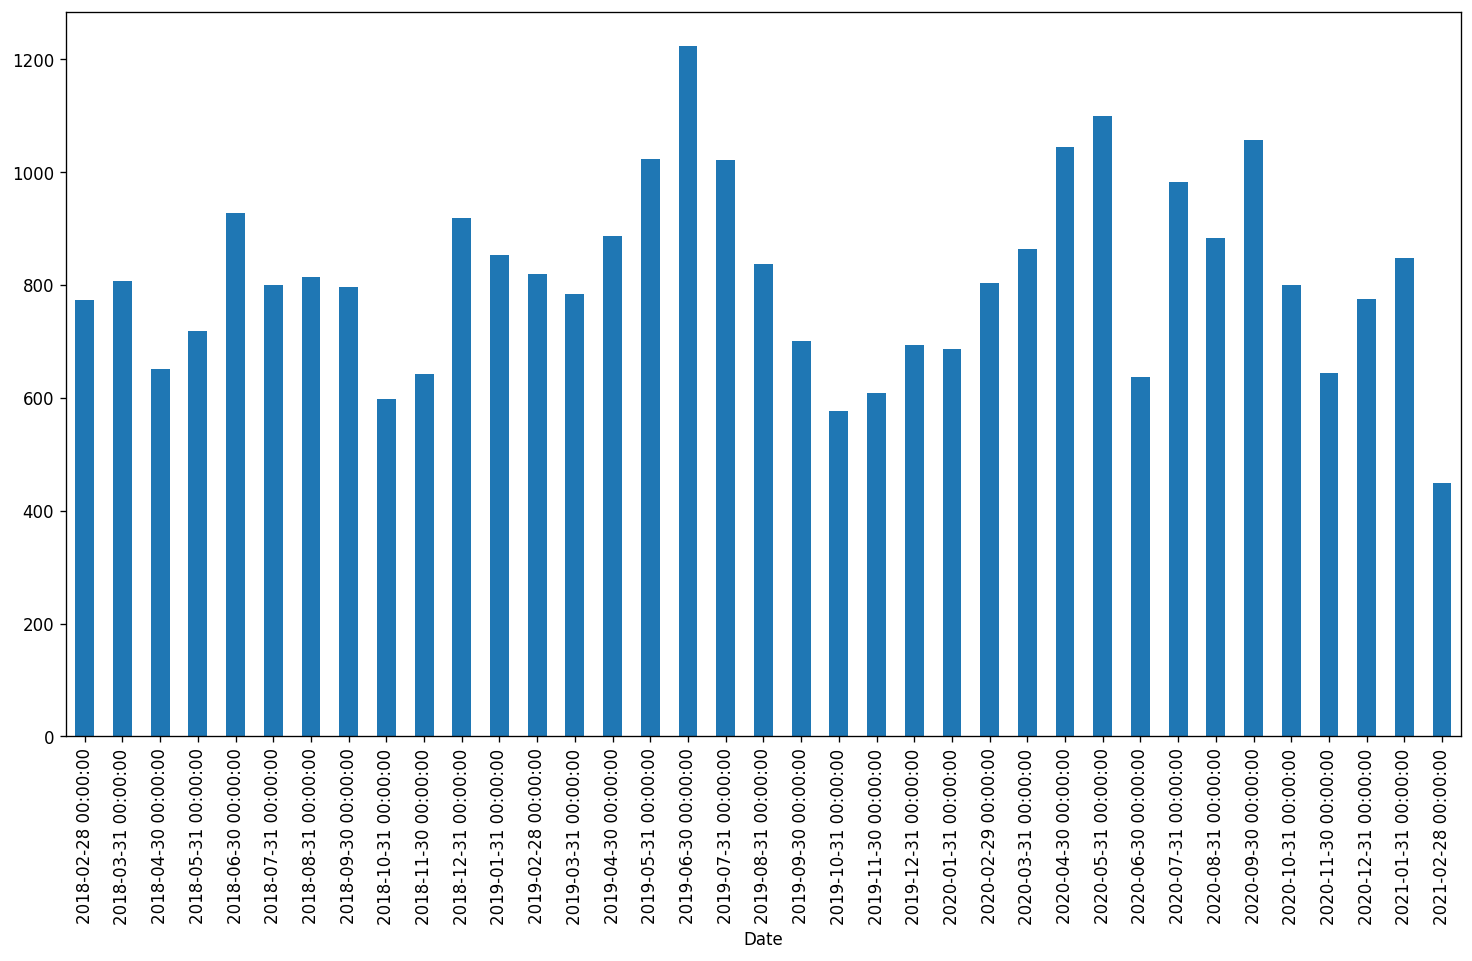

In [76]:
plt.figure(figsize=(15,8) , dpi = 120)
df['target_load'].resample(rule = "M").std().plot.bar()

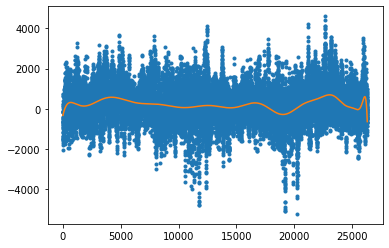

In [149]:
import warnings
warnings.filterwarnings("ignore")
x = np.array(range(len(df)))
y = np.array(df.target_load)
plt.plot(x,y,'.')
p60 = np.poly1d(np.polyfit(x, y, 60))

plt.plot(x,p60(x))


In [154]:
df_analysis = df[['target_load']]


,target_load
Date,
2018-02-01 00:00:00,49.249
2018-02-01 01:00:00,658.522
2018-02-01 02:00:00,658.522
2018-02-01 03:00:00,-788.520
2018-02-01 04:00:00,-497.190
...,...
2018-02-09 03:00:00,791.804
2018-02-09 04:00:00,905.962
2018-02-09 05:00:00,912.538


In [156]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [160]:
df_analysis = df_analysis.values
df_analysis = df_analysis.reshape(-1,1)
df_analysis[:10]

array([[   49.249],
       [  658.522],
       [  658.522],
       [ -788.52 ],
       [ -497.19 ],
       [ -653.61 ],
       [-1171.17 ],
       [-1511.464],
       [ -678.893],
       [-1330.856]])

In [165]:
dataset_train = np.array(df_analysis[:int(df_analysis.shape[0]*0.8)])
dataset_test = np.array(df_analysis[int(df_analysis.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)

dataset_test = scaler.transform(dataset_test)
dataset_test[:2]

(21062, 1)
(5316, 1)


array([[0.61076325],
       [0.62734205],
       [0.68734808],
       [0.63501129],
       [0.65344384]])

In [166]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y
x_train, y_train = create_dataset(dataset_train)
x_train[:2]

array([[   49.249,   658.522,   658.522,  -788.52 ,  -497.19 ,  -653.61 ,
        -1171.17 , -1511.464,  -678.893, -1330.856, -1463.43 , -1484.8  ,
        -1560.814, -1697.01 , -1188.31 , -2036.294, -1816.394, -1508.003,
        -1612.12 , -1426.83 , -1376.29 ,  -805.079, -1178.467,  -721.866,
         -155.9  ,  -155.9  ,  -155.9  ,  -155.9  ,  -126.546,  -480.283,
         -923.942, -1005.972,  -606.756,  -606.756,  -637.389,  -637.389,
         -110.352,  -490.482,  -430.117,  -430.117,   223.115,   730.923,
          713.476,   225.729,   411.683,  -884.21 ,  -961.756,  -180.707,
         -736.17 ,   130.978],
       [  658.522,   658.522,  -788.52 ,  -497.19 ,  -653.61 , -1171.17 ,
        -1511.464,  -678.893, -1330.856, -1463.43 , -1484.8  , -1560.814,
        -1697.01 , -1188.31 , -2036.294, -1816.394, -1508.003, -1612.12 ,
        -1426.83 , -1376.29 ,  -805.079, -1178.467,  -721.866,  -155.9  ,
         -155.9  ,  -155.9  ,  -155.9  ,  -126.546,  -480.283,  -923.942,
       

In [168]:
y_train

array([ 130.978,   28.675,   28.675, ...,  665.785, 1158.963,  872.726])

In [170]:
x_test, y_test = create_dataset(dataset_test)


In [171]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [180]:
x_train.shape[1]

50

In [185]:
model = Sequential()


In [94]:
# model.add(LSTM(units=150, return_sequences=True, input_shape=(50, 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_train, y_train, epochs = 100, batch_size = 32)